In [206]:
#Import the necessary libraries: pandas, matplotlib, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [207]:
#load the CSV file
TRAIN_CSV = "C:/Users/juane/OneDrive/Escritorio/Datos/Dataset_Titanic/train.csv"
TEST_CSV = "C:/Users/juane/OneDrive/Escritorio/Datos/Dataset_Titanic/test.csv"

In [208]:
# Merge the two datasets
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
all_data_df = pd.concat([train_df, test_df], keys=['train', 'test'])

In [209]:
# Display the first few rows of the combined dataset
all_data_df.head()

PassengerId  Survived  Pclass  \
train 0            1       0.0       3   
      1            2       1.0       1   
      2            3       1.0       3   
      3            4       1.0       1   
      4            5       0.0       3   

                                                      Name     Sex   Age  \
train 0                            Braund, Mr. Owen Harris    male  22.0   
      1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
      2                             Heikkinen, Miss. Laina  female  26.0   
      3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
      4                           Allen, Mr. William Henry    male  35.0   

         SibSp  Parch            Ticket     Fare Cabin Embarked  
train 0      1      0         A/5 21171   7.2500   NaN        S  
      1      1      0          PC 17599  71.2833   C85        C  
      2      0      0  STON/O2. 3101282   7.9250   NaN        S  
      3      1      0            113803  53.1000  C123        S  
      4      0      0            373450   8.0500   NaN        S

In [210]:
# Display a concise summary of the combined dataset, including the data types and non-null values for each column
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 166.0+ KB


In [211]:
# Generate descriptive statistics for the combined dataset, including count, mean, standard deviation, min, and max values for each column
all_data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [212]:
# Select only the relevant columns
relevant_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
relevant_data_df = all_data_df[relevant_columns]

# Display the first few rows of the new dataset
relevant_data_df.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
train 0       3    male  22.0      1      0   7.2500        S       0.0
      1       1  female  38.0      1      0  71.2833        C       1.0
      2       3  female  26.0      0      0   7.9250        S       1.0
      3       1  female  35.0      1      0  53.1000        S       1.0
      4       3    male  35.0      0      0   8.0500        S       0.0

In [213]:
# Count the number of missing values in each column of the relevant dataset
relevant_data_df.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
Survived    418
dtype: int64

In [158]:
# Impute missing values in the 'Age' column with the median value
relevant_data_df['Age'].fillna(relevant_data_df['Age'].median(), inplace=True)

# Impute missing values in the 'Fare' column with the median value
relevant_data_df['Fare'].fillna(relevant_data_df['Fare'].median(), inplace=True)

# Impute missing values in the 'Embarked' column with the mode (most frequent value)
relevant_data_df['Embarked'].fillna(relevant_data_df['Embarked'].mode()[0], inplace=True)


In [159]:
# Count the number of missing values in each column of the relevant dataset
relevant_data_df.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Survived    418
dtype: int64

In [160]:
# Display a concise summary of the combined dataset, including the data types and non-null values for each column
relevant_data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Survived  891 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 125.0+ KB


In [161]:
# Filter only the rows with training data (where 'Survived' is not null)
train_data_df = relevant_data_df[relevant_data_df['Survived'].notnull()]

# Verify that there are no missing values in the training dataset
print(train_data_df.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


In [162]:
# Style configuration
sns.set(style="whitegrid")

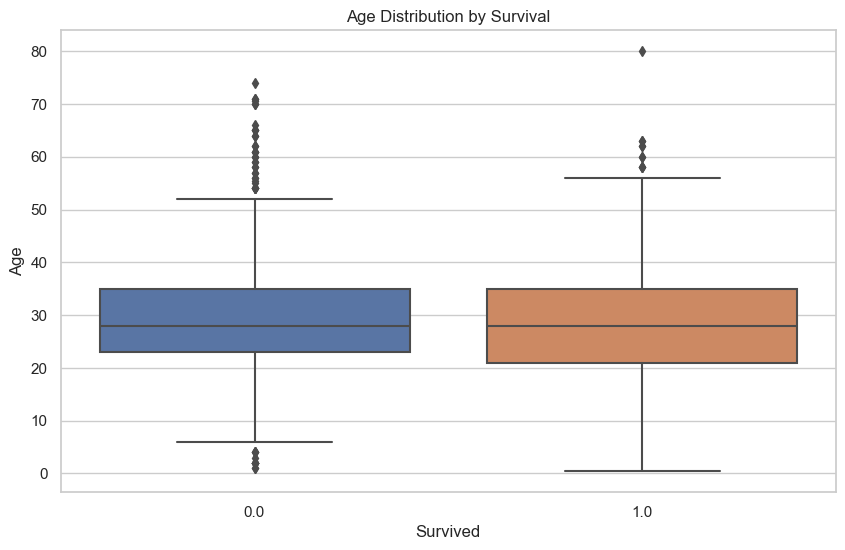

In [163]:
# 1. Boxplot of Age by Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=train_data_df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

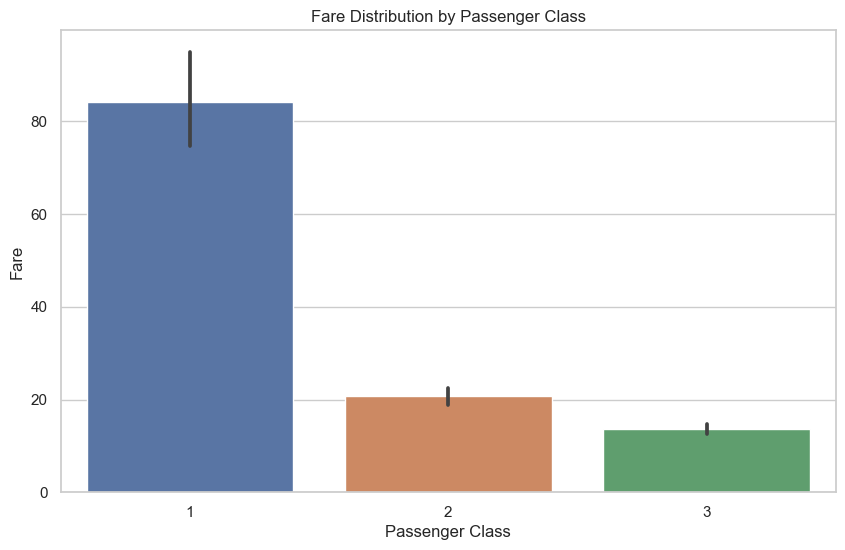

In [164]:
# 2. Boxplot plot of Fare by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Fare', data=train_data_df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

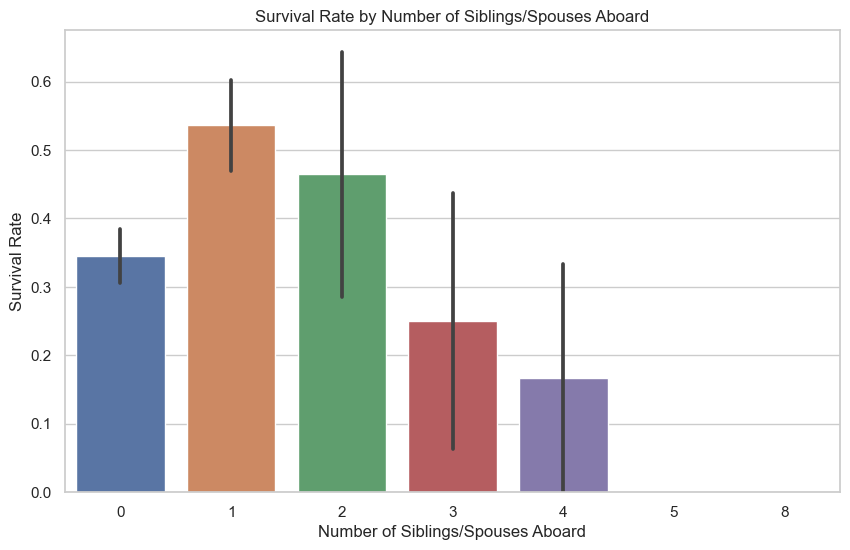

In [165]:
# 3. Bar plot of Survival by Number of Siblings/Spouses Aboard
plt.figure(figsize=(10, 6))
sns.barplot(x='SibSp', y='Survived', data=train_data_df)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()

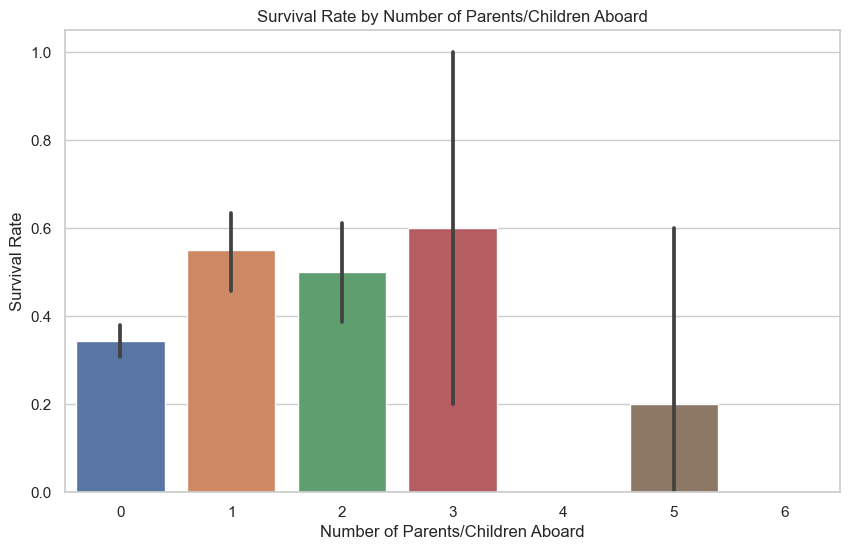

In [166]:
# 4. Bar plot of Survival by Number of Parents/Children Aboard
plt.figure(figsize=(10, 6))
sns.barplot(x='Parch', y='Survived', data=train_data_df)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.show()

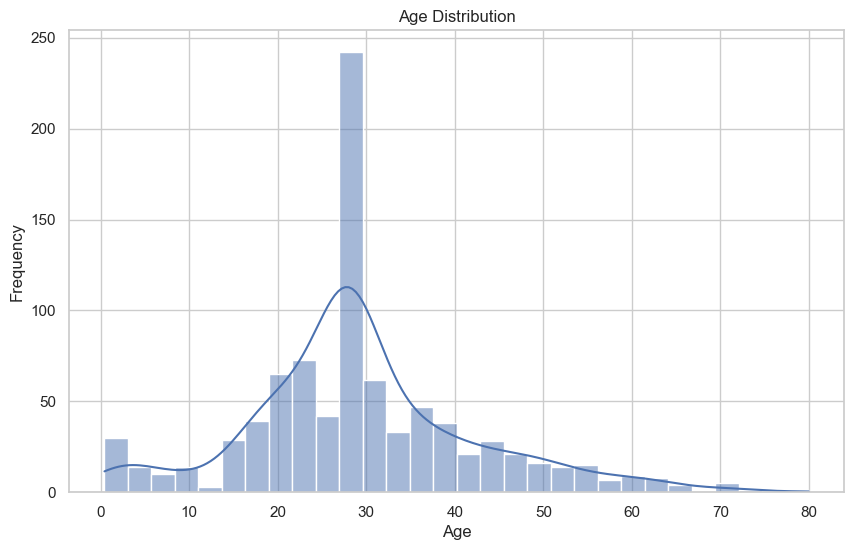

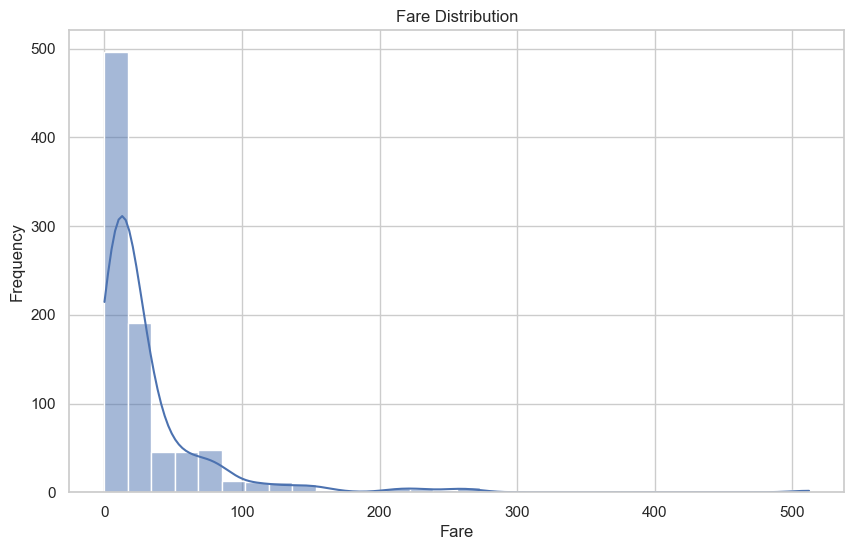

In [167]:
# 5. Histograms of Age and Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_data_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

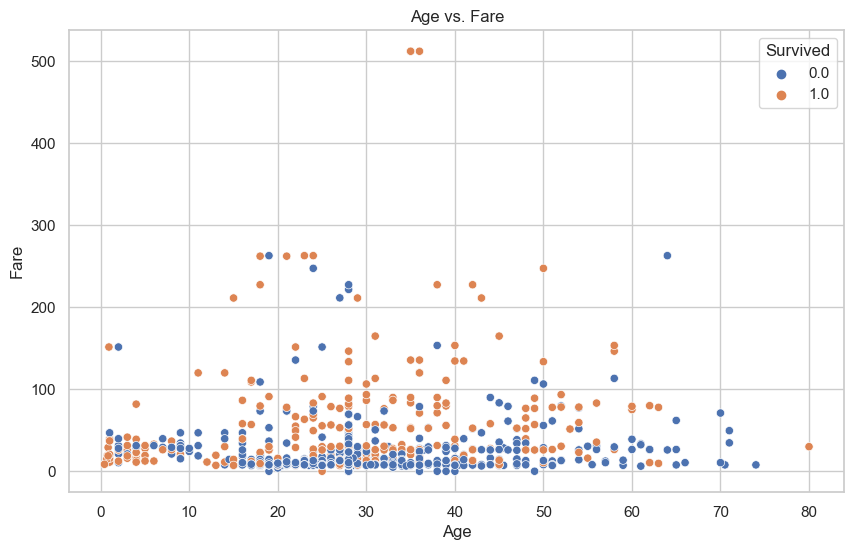

In [168]:
# 6. Scatter plot of Age vs. Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data_df)
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

<Figure size 1000x600 with 0 Axes>

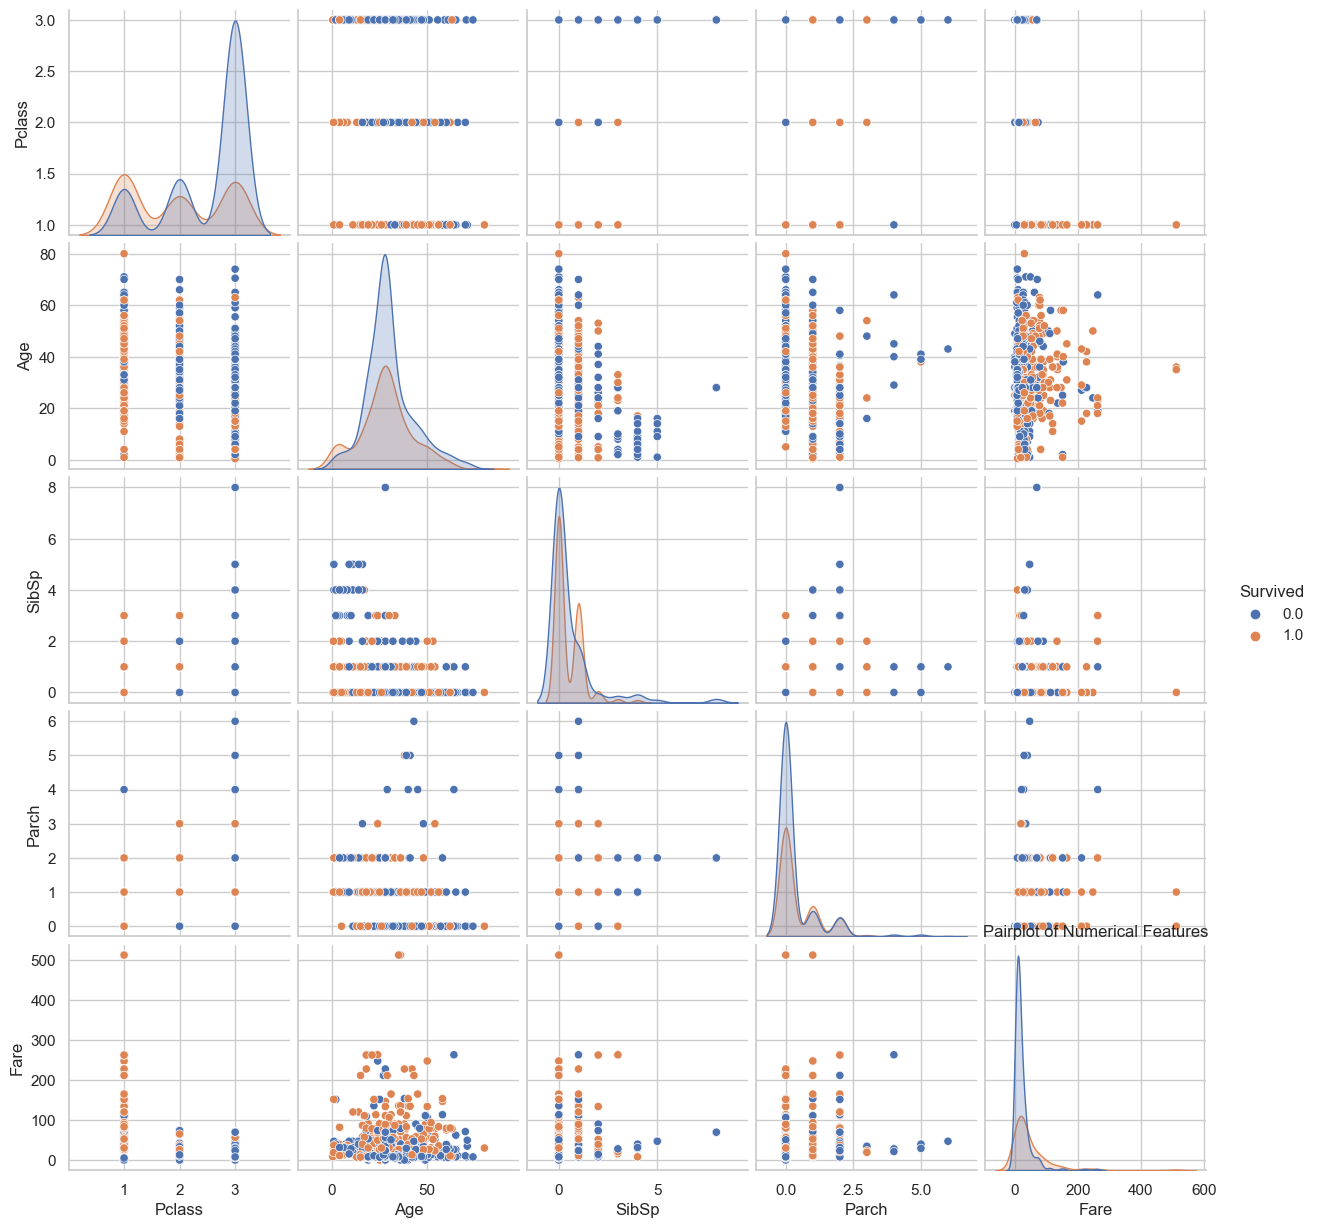

In [169]:
# 7. Pair plot of Numerical Features
plt.figure(figsize=(10, 6))
sns.pairplot(train_data_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']], hue='Survived')
plt.title('Pairplot of Numerical Features')
plt.show()

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [171]:
# Encode the 'Sex' column
train_data_df['Sex'] = train_data_df['Sex'].map({'male': 0, 'female': 1})

# Encode the 'Embarked' column
train_data_df['Embarked'] = train_data_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [172]:
# Select features and target variable
X = train_data_df.drop('Survived', axis=1)
y = train_data_df['Survived']

In [173]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [175]:
# Make predictions
y_pred = model.predict(X_test)

In [176]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       105
         1.0       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
[[92 13]
 [18 56]]


In [180]:
from sklearn.metrics import roc_curve, roc_auc_score

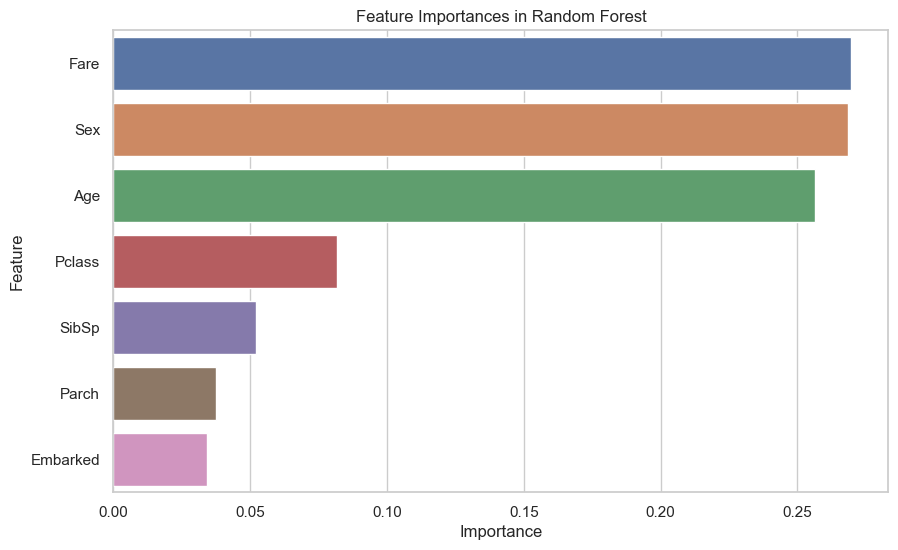

In [181]:
# 1. Feature Importances in Random Forest
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

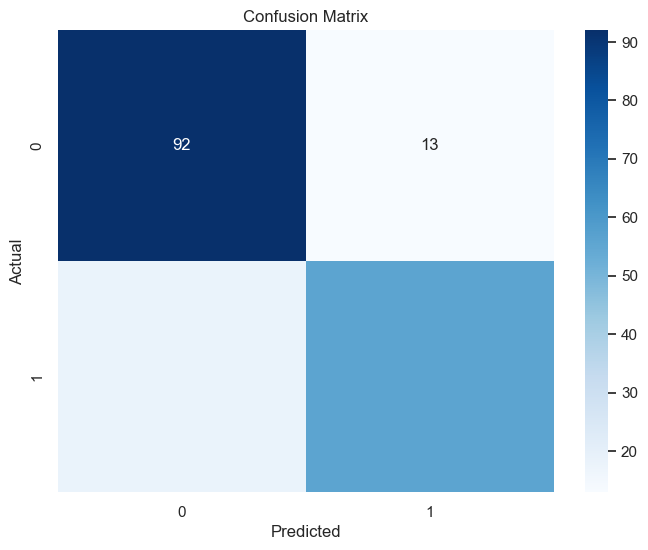

In [199]:
# 2. Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

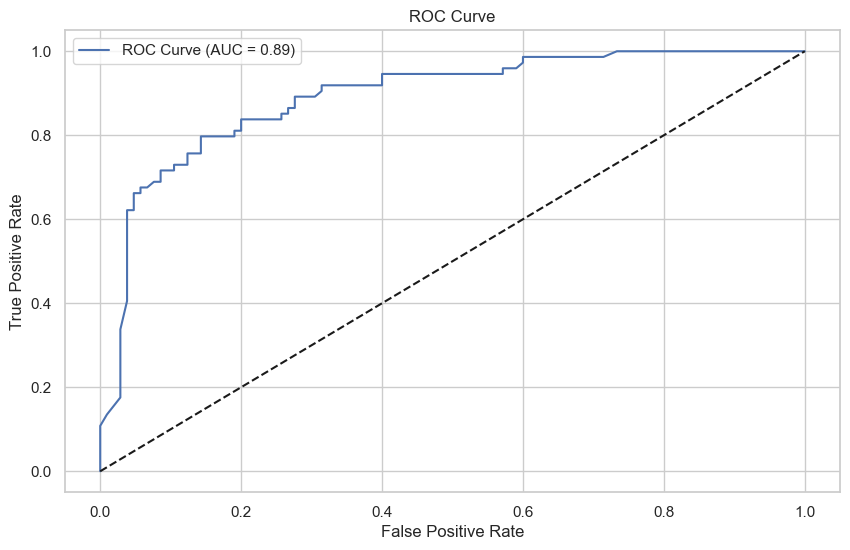

In [183]:
# 3. ROC Curve
plt.figure(figsize=(10, 6))
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

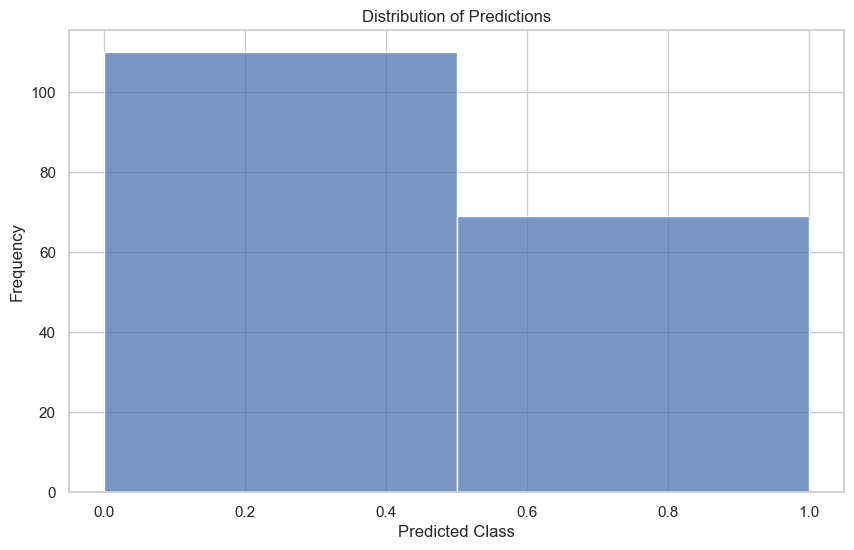

In [200]:
# 4. Distribution of Predictions
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=2, kde=False)
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.show()

In [201]:
# 1. Feature Importances in Random Forest
# This bar plot shows the importance of each feature used in the Random Forest model.
# The features are sorted by their importance, with the most important features at the top.
# This helps to understand which features have the most influence on the model's predictions.

In [202]:
# 2. Confusion Matrix
# The confusion matrix is a table that summarizes the performance of the classification model.
# It shows the number of true positive, true negative, false positive, and false negative predictions.
# This helps to evaluate how well the model is distinguishing between the different classes.

In [203]:
# 3. ROC Curve and AUC
# The ROC (Receiver Operating Characteristic) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
# The AUC (Area Under the Curve) value indicates the overall performance of the model.
# A higher AUC value means better model performance.
# This curve helps to visualize the trade-off between sensitivity and specificity.

In [204]:
# 4. Distribution of Predictions
# This histogram shows the distribution of the predicted classes.
# It indicates how many instances were predicted for each class.
# This helps to understand the balance of predictions made by the model.

In [214]:
test_data = {
    'Pclass': [3, 1],  # Passenger class
    'Sex': [0, 1],     # Sex (0 = male, 1 = female)
    'Age': [22, 38],   # Age
    'SibSp': [1, 1],   # Number of siblings/spouses aboard
    'Parch': [0, 0],   # Number of parents/children aboard
    'Fare': [7.25, 71.2833],  # Ticket fare
    'Embarked': [0, 1]  # Port of embarkation (0 = S, 1 = C, 2 = Q)
}

# Create a DataFrame with the test data
test_df = pd.DataFrame(test_data)

# Make predictions with the model
predictions = model.predict(test_df)

# Add the predictions to the DataFrame
test_df['Predicted_Survived'] = predictions

# Display the input data and predictions in a detailed manner
print("Test Data and Predictions:")
print(test_df.to_string(index=False))


Test Data and Predictions:
 Pclass  Sex  Age  SibSp  Parch    Fare  Embarked  Predicted_Survived
      3    0   22      1      0  7.2500         0                 0.0
      1    1   38      1      0 71.2833         1                 1.0
